In [14]:
# Regression 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor

import pickle
from sklearn.dummy import DummyRegressor
import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt

In [15]:
#Open file
with open('Clean_final_Project.pickle', 'rb') as data:
        dataset = pickle.load(data)

In [16]:
dataset.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built,zipcode,lat,long,Monthly_Mortage,Possible_Rent,Net_Profit
0,221900,3,1,1180,5650,1,3,1180,1955,98178,47,-122,1008.86,2750.0,1741.14
1,538000,3,2,2570,7242,2,3,2170,1951,98125,47,-122,2445.99,2750.0,304.01
2,180000,2,1,770,10000,1,3,770,1933,98028,47,-122,818.36,1500.0,681.64
3,604000,4,3,1960,5000,1,5,1050,1965,98136,47,-122,2746.06,3250.0,503.94
4,510000,3,2,1680,8080,1,3,1680,1987,98074,47,-122,2318.69,2750.0,431.31


In [17]:
#Dropping columns
dataset.drop(['lat','long'],axis = 1,inplace = True)

In [18]:
#Split data into training and testing set with 90% of the data going into training
training, testing = train_test_split(dataset, test_size=0.1, random_state=0)
print("Total sample size = %i; training sample size = %i, testing sample size = %i"\
     %(dataset.shape[0],training.shape[0],testing.shape[0]))

Total sample size = 21257; training sample size = 19131, testing sample size = 2126


In [19]:
#training and testing
df_train = training.loc[:,dataset.columns]
X_train = df_train.drop(['Net_Profit'], axis=1)
y_train = df_train.loc[:, ['Net_Profit']]

df_test = testing.loc[:,dataset.columns]
X_test = df_test.drop(['Net_Profit'], axis=1)
y_test = df_test.loc[:, ['Net_Profit']]

In [20]:
X_train.shape


(19131, 12)

In [21]:
y_train.shape

(19131, 1)

In [22]:
dataset['Net_Profit'].describe()

count    21257.000000
mean       370.090004
std       1506.869449
min     -14526.520000
25%       -205.080000
50%        649.810000
75%       1363.220000
max       2935.320000
Name: Net_Profit, dtype: float64

# Linnear

In [23]:
from sklearn.model_selection import cross_val_score
# Create the regressor: linreg
linreg = LinearRegression()

# Fit the regressor to the training data
linreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = linreg.predict(X_test)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_linreg = cross_val_score(linreg, X_train, y_train, cv=5)

In [24]:
from sklearn.metrics import mean_squared_error
print("R^2: {}".format(linreg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_linreg)))
# Print the 5-fold cross-validation scores
print(cv_scores_linreg)

R^2: 1.0
Root Mean Squared Error: 1.3448174024273275e-10
Average 5-Fold CV Score: 1.0
[1. 1. 1. 1. 1.]


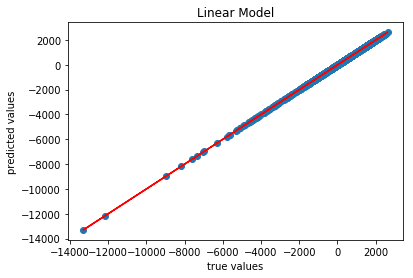

In [25]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Linear Model")
plt.show()

# Ridge

In [35]:
ridge = Ridge()

ridge.fit(X_train, y_train)

y_pred_s_r = ridge.predict(X_test)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_r = cross_val_score(rf_reg, X_train, y_train, cv=5)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

In [36]:
print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_s_r))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_r)))
# Print the 5-fold cross-validation scores
print(cv_scores_r)

R^2: 0.9999999999968245
Root Mean Squared Error: 0.0025106133948496084
Average 5-Fold CV Score: 0.9993767486872385
[0.99887395 0.99954776 0.99942371 0.99926845 0.99976987]


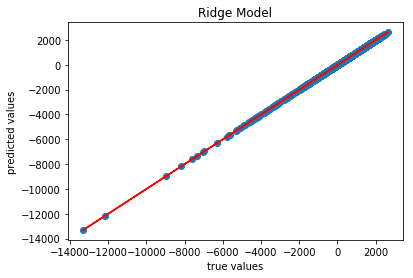

In [37]:
plt.scatter(y_test, y_pred_s_r)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Ridge Model")
plt.show()

# Lasso

In [38]:
lasso = Lasso()

lasso.fit(X_train, y_train)

y_pred_s_l = lasso.predict(X_test)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_l = cross_val_score(rf_reg, X_train, y_train, cv=5)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

In [39]:
print("R^2: {}".format(lasso.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_s_l))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_l)))
# Print the 5-fold cross-validation scores
print(cv_scores_l)

R^2: 0.9999999962497722
Root Mean Squared Error: 0.08627949533628944
Average 5-Fold CV Score: 0.999349397863516
[0.99907285 0.99955713 0.99896804 0.99938898 0.99975998]


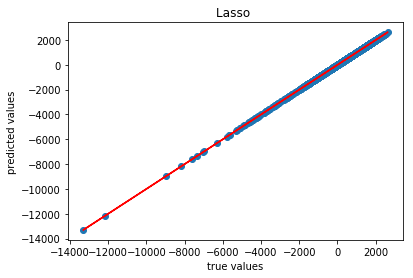

In [40]:
plt.scatter(y_test, y_pred_s_l)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Lasso ")
plt.show()

# Random Forest Model

In [41]:
rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)

y_pred_s_rf = rf_reg.predict(X_test)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_rf = cross_val_score(rf_reg, X_train, y_train, cv=5)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

In [42]:
print("R^2: {}".format(rf_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_s_rf))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_rf)))
# Print the 5-fold cross-validation scores
print(cv_scores_rf)

R^2: 0.9998159762728601
Root Mean Squared Error: 19.112420124626457
Average 5-Fold CV Score: 0.9993755500670993
[0.99903542 0.99952911 0.99918054 0.99940135 0.99973133]


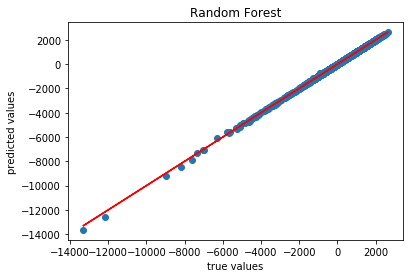

In [43]:
plt.scatter(y_test, y_pred_s_rf)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Random Forest")
plt.show()

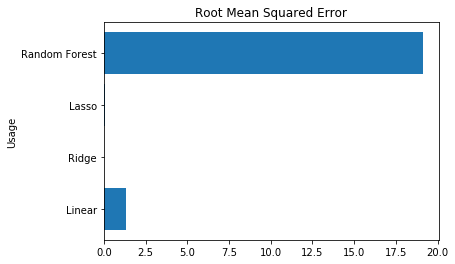

In [45]:
import numpy as np
import matplotlib.pyplot as plt
objects = ('Linear', 'Ridge', 'Lasso', 'Random Forest')
y_pos = np.arange(len(objects))
performance = [1.34,0.002,0.08,19.11]

plt.barh(y_pos, performance, align='center',)
plt.yticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Root Mean Squared Error')

plt.show()